<a href="https://colab.research.google.com/github/noushadkhan01/Grokking-Deep-Learning/blob/master/Chapter3%20-%20%20Forward%20Propagation%20-%20Intro%20to%20Neural%20Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Simple Neural Network Making a Prediction

### What is a Neural Network?

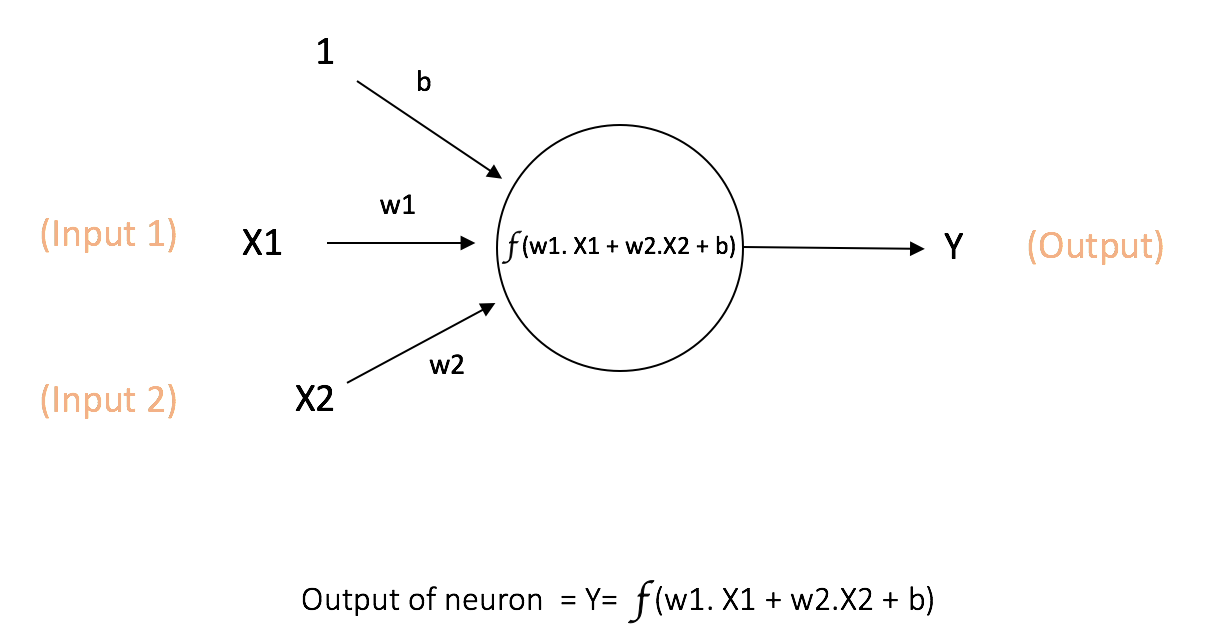

In [2]:
from IPython.display import Image
Image('https://ujwlkarn.files.wordpress.com/2016/08/screen-shot-2016-08-09-at-3-42-21-am.png',width = 500, height = 300 )

In [3]:
# The network:
#for single variable or single inputs
#bias is zero
weight = 0.1 
def neural_network(inputs, weight):
    prediction = inputs * weight
    return prediction

# How we use the network to predict something:

number_of_toes = [8.5, 9.5, 10, 9]
inputs = number_of_toes[0]
pred = neural_network(inputs,weight)
print(pred)

0.8500000000000001


# Making a Prediction with Multiple inputs

### Complete Runnable Code

In [124]:
shape = inputs.shape
shape

(3,)

In [0]:
import numpy as np
np.random.seed(2)

In [0]:
#initialize weights from standard normal distribution
def initialize_weights(shape, **kwargs):
  import numpy as np
  mean = kwargs.get('mean')
  sigma = kwargs.get('sigma')
  random_state = kwargs.get('random_state')
  if not mean:
    mean = 0
  if not sigma:
    sigma = 1
  if not random_state:
    random_state = 0
  np.random.seed(random_state)
  rows, columns = shape
  weights = sigma * np.random.randn(rows, columns) + mean
  return weights

In [102]:
weights = [0.1, 0.2, 0] 
import numpy as np
np.random.seed(0)
def sum_w(inputs,weights, **kwargs):
  import numpy as np
  if weights:
    assert(len(inputs) == len(weights))
  else:
    l = len(inputs)
    weights = initialize_weights((1, l), **kwargs)
    weights = weights[0]
  output = 0
  for i in range(len(inputs)):
    output += inputs[i] * weights[i]
  return output
def neural_network(inputs,weights = None, **kwargs):
  pred = sum_w(inputs, weights, **kwargs)
  return pred

# This dataset is the current
# status at the beginning of
# each game for the first 4 games
# in a season.

# toes = current number of toes
# wlrec = current games won (percent)
# nfans = fan count (in millions)

toes =  [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

#  corresponds to every entry
# for the first game of the season.
inputs = list(zip(toes, wlrec, nfans))[0]
neural_network(inputs, sigma = .02, mean = 0)

0.3285806541418146

### NumPy Code

In [125]:
import numpy as np
np.random.seed(0)
def neural_network(inputs, weights = None, **kwargs):
    if not weights:
      l = len(inputs)
      weights = initialize_weights((l, 1), **kwargs)
    #dot product we can dot product two vecotors by v1.dot(v2) or v1 @ v2
    pred = inputs @ weights
    #pred is an array so we need to return it's element for single output
    return pred[0]
    
toes =  np.array([8.5, 9.5, 9.9, 9.0])
wlrec = np.array([0.65, 0.8, 0.8, 0.9])
nfans = np.array([1.2, 1.3, 0.5, 1.0])

# inputs corresponds to every entry
# for the first game of the season.
inputs = np.array([toes, wlrec, nfans]).T
#select first columns
inputs = inputs[0, :]
pred = neural_network(inputs, mean = 0, sigma = .02)

print(pred)

0.3285806541418146


# Making a Prediction with Multiple Outputs

In [141]:
def sum_w(inputs, weights,**kwargs):
  outputs = [0 for i in range(inputs.shape[0])]
  if weights:
    #we want as many weights as columns or independent variables are presents
    assert(inputs.shape[1] == len(weights))
  if not weights:
    columns = inputs.shape[1]
    #we are intialising weight in shape (columns, 1) instead of (columns, 1 ) because we are doing multiplication manually instead of dot product
    weights = initialize_weights((1, columns), **kwargs)
    weights = weights[0]
  for n1, i in enumerate(inputs):
    for n2, j in enumerate(i):
      outputs[n1] += j * weights[n2]
  return outputs

def neural_nets(inputs, weights = None, **kwargs):
  return sum_w(inputs, weights, **kwargs)


weights = [0.1, 0.2, 0]
toes =  [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
inputs = np.array([toes, wlrec, nfans]).T
neural_nets(inputs, mean = 0, sigma = 0.02, random_state = 0)

[0.3285806541418146,
 0.36701964865448106,
 0.3654722596765305,
 0.3443070117069044]

# Predicting with Multiple inputs & Outputs

In [161]:
            #toes %win #fans
weights = [ [0.1, 0.1, -0.3], #hurt?
            [0.1, 0.2, 0.0], #win?
            [0.0, 1.3, 0.1] ] #sad?

#in this method we need to find probability for every class for every input
def w_sum(inputs, weights):
    output = 0
    for i in range(len(inputs)):
        output += (inputs[i] * weights[i])
    return output

def inputs_weights_mul(inputs, weights, n_class, **kwargs):
  if weights:
    assert(len(inputs) == len(weights))
  if not weights:
    l = len(inputs)
    weights = initialize_weights((l, n_class), **kwargs)
    assert(len(inputs) == len(weights))
  #for n_class no. of outputs we need to transpose it
    weights = weights.T
    #no of classes
  output = [0 for i in range(n_class)]
  for i in range(n_class):
      output[i] = w_sum(inputs, weights[i])
  return output

def neural_network(inputs, weights = None, n_class = 3, **kwargs):
    pred = inputs_weights_mul(inputs, weights, n_class, **kwargs)
    return pred

# This dataset is the current
# status at the beginning of
# each game for the first 4 games
# in a season.

# toes = current number of toes
# wlrec = current games won (percent)
# nfans = fan count (in millions)

toes =  [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

# inputs corresponds to every entry
# for the first game of the season.

inputs = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(inputs, weights = None, n_class = 4, sigma = .1, mean = 0)

print(pred)

[1.6084495012170354, 0.3258823851527778, 0.910968262168347, 2.0694338216174457]


## Multi layer ANN With sigmoid

**its not fully updated will update soon**

In [0]:
def sum_w(inputs, weights):
  outputs = [0 for i in range(inputs.shape[0])]
  assert(inputs.shape[1] == len(weights[0]))
  for n1, i in enumerate(inputs):
    for n2, j in enumerate(i):
      outputs[n1] += (j * weights[0][n2])*weights[1][n2]
      
  #apply sigmoid function
  outputs =  [1 / (1 + np.exp(-i)) for i in outputs]
  return [1 if i >= .5 else 0 for i in outputs]

def neural_nets(inputs, weights):
  return sum_w(inputs, weights)


toes =  [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65, 0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]
inputs = np.transpose(np.array([toes, wlrec, nfans]))
neural_nets(inputs, weights)

[1, 1, 1, 1]

# Predicting on Predictions

In [0]:
            #toes %win #fans
ih_wgt = [ [0.1, 0.2, -0.1], #hid[0]
           [-0.1,0.1, 0.9], #hid[1]
           [0.1, 0.4, 0.1] ] #hid[2]

           #hid[0] hid[1] hid[2]
hp_wgt = [ [0.3, 1.1, -0.3], #hurt?
           [0.1, 0.2, 0.0], #win?
           [0.0, 1.3, 0.1] ] #sad?

weights = [ih_wgt, hp_wgt]

def neural_network(inputs, weights):
    hid = vect_mat_mul(inputs,weights[0])
    pred = vect_mat_mul(hid,weights[1])
    return pred

toes =  [8.5, 9.5, 9.9, 9.0]
wlrec = [0.65,0.8, 0.8, 0.9]
nfans = [1.2, 1.3, 0.5, 1.0]

# inputs corresponds to every entry
# for the first game of the season.

inputs = [toes[0],wlrec[0],nfans[0]]
pred = neural_network(inputs,weights)

print(pred)

[0.21350000000000002, 0.14500000000000002, 0.5065]


# NumPy Version

In [0]:
import numpy as np

#toes %win #fans
ih_wgt = np.array([ 
            [0.1, 0.2, -0.1], #hid[0]
            [-0.1,0.1, 0.9], #hid[1]
            [0.1, 0.4, 0.1]]).T #hid[2]


# hid[0] hid[1] hid[2]
hp_wgt = np.array([  
            [0.3, 1.1, -0.3], #hurt?
            [0.1, 0.2, 0.0], #win?
            [0.0, 1.3, 0.1] ]).T #sad?

weights = [ih_wgt, hp_wgt]

def neural_network(inputs, weights):

    hid = inputs.dot(weights[0])
    pred = hid.dot(weights[1])
    return pred


toes =  np.array([8.5, 9.5, 9.9, 9.0])
wlrec = np.array([0.65,0.8, 0.8, 0.9])
nfans = np.array([1.2, 1.3, 0.5, 1.0])

inputs = np.array([toes[0],wlrec[0],nfans[0]])

pred = neural_network(inputs,weights)
print(pred)

[0.2135 0.145  0.5065]


# A Quick Primer on NumPy

In [0]:
import numpy as np

a = np.array([0,1,2,3]) # a vector
b = np.array([4,5,6,7]) # another vector
c = np.array([[0,1,2,3], # a matrix
              [4,5,6,7]])

d = np.zeros((2,4)) # (2x4 matrix of zeros)
e = np.random.rand(2,5) # random 2x5
# matrix with all numbers between 0 and 1

print(a)
print(b)
print(c)
print(d)
print(e)

[0 1 2 3]
[4 5 6 7]
[[0 1 2 3]
 [4 5 6 7]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0.76263132 0.95029382 0.12331113 0.68185729 0.63852539]
 [0.32761021 0.3561095  0.5394378  0.31100166 0.10203728]]


In [0]:
print(a * 0.1) # multiplies every number in vector "a" by 0.1
      
print(c * 0.2) # multiplies every number in matrix "c" by 0.2
      
print(a * b) # multiplies elementwise between a and b (columns paired up)
      
print(a * b * 0.2) # elementwise multiplication then multiplied by 0.2
      
print(a * c) # since c has the same number of columns as a, this performs
# elementwise multiplication on every row of the matrix "c"

print(a * e) # since a and e don't have the same number of columns, this
# throws a "Value Error: operands could not be broadcast together with.."

[0.  0.1 0.2 0.3]
[[0.  0.2 0.4 0.6]
 [0.8 1.  1.2 1.4]]
[ 0  5 12 21]
[0.  1.  2.4 4.2]
[[ 0  1  4  9]
 [ 0  5 12 21]]


ValueError: ignored

In [0]:
a = np.zeros((1,4)) # vector of length 4
b = np.zeros((4,3)) # matrix with 4 rows & 3 columns

c = a.dot(b)
print(c.shape)

(1, 3)


In [0]:
a = np.zeros((2,4)) # matrix with 2 rows and 4 columns
b = np.zeros((4,3)) # matrix with 4 rows & 3 columns

c = a.dot(b)
print(c.shape) # outputs (2,3)

e = np.zeros((2,1)) # matrix with 2 rows and 1 columns
f = np.zeros((1,3)) # matrix with 1 row & 3 columns

g = e.dot(f)
print(g.shape) # outputs (2,3)

h = np.zeros((5,4)).T # matrix with 4 rows and 5 columns
i = np.zeros((5,6)) # matrix with 6 rows & 5 columns

j = h.dot(i)
print(j.shape) # outputs (4,6)

h = np.zeros((5,4)) # matrix with 5 rows and 4 columns
i = np.zeros((5,6)) # matrix with 5 rows & 6 columns
j = h.dot(i)
print(j.shape) # throws an error

(2, 3)
(2, 3)
(4, 6)


ValueError: shapes (5,4) and (5,6) not aligned: 4 (dim 1) != 5 (dim 0)